In [1]:
import numpy as np
import pandas as pd
import time as tm
import datetime as dt
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
import ast
import json

placesCsvPath = 'data/places.csv'
df_places = pd.read_csv(placesCsvPath, sep='\t')
#print(df_places.head())

print('done')

done


In [13]:
us_states = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']
country = []
state = []
for i in df_places['address']:
    a = i.split(',')
    b = a[-1][:-1]
    c = ''.join(i for i in b if not i.isdigit())
    d = c.strip()
    e = d if d else a[-2].strip()
    f = e[2:] if len(e)>1 and e[:2] == 'b\'' else e
    #print(i)
    if len(f) == 1:
        country.append(None)
        state.append(None)
    elif len(f) == 2 or f in us_states:
        country.append('United States')
        state.append(f)
    elif '\\' in f:
        country.append('China')
        state.append(None)
    else:
        country.append(f)
        state.append(None)

print('done')

done


In [14]:
df_places['country'] = country
#print(df_places['country'][:10])

df_places['state'] = state
#print(df_places['state'][:10])

print('done')

done


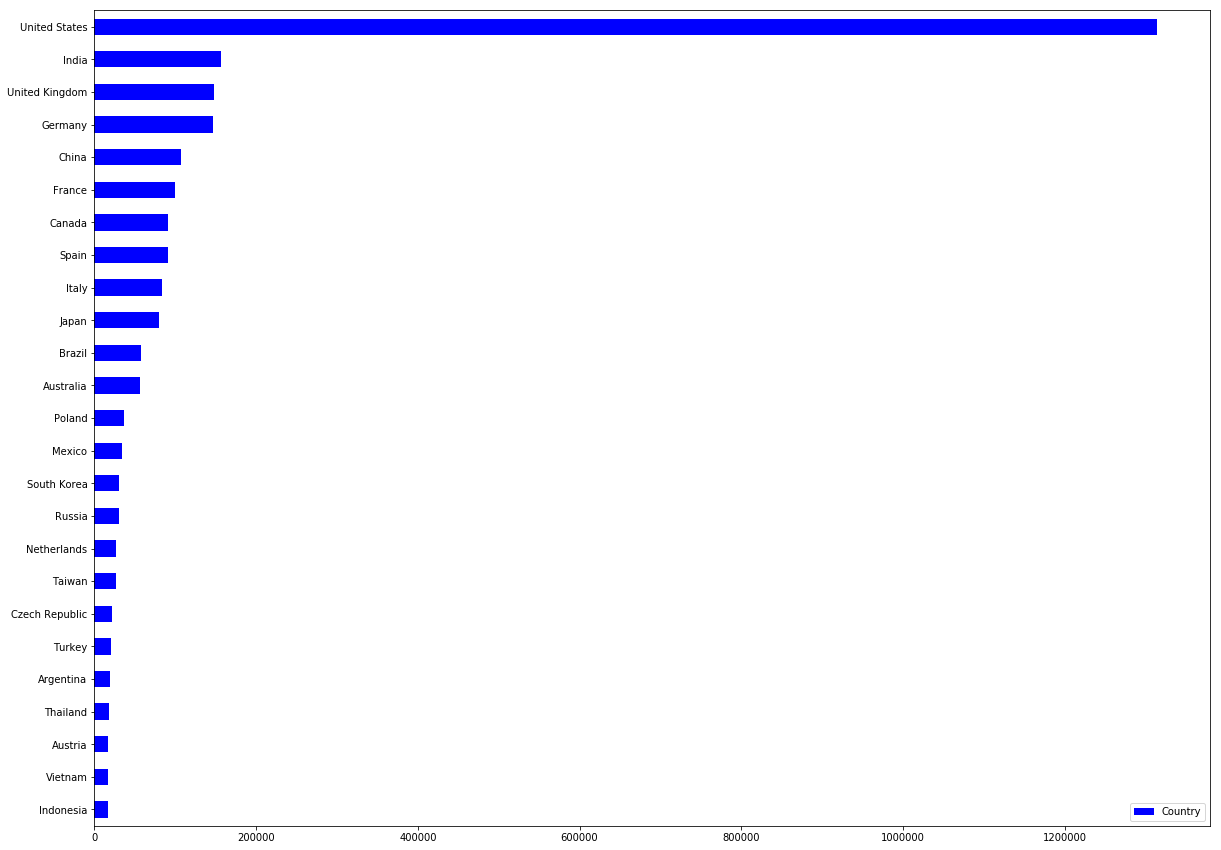

In [43]:
# show the number of places in each country
country_counts = defaultdict(int)
for c in df_places['country']:
    country_counts[c] += 1

t = [(k, country_counts[k]) for k in list(country_counts.keys())]
s = sorted(t, key=lambda x:x[1])
types = [i[0] for i in s[-25:]]
data = [i[1] for i in s[-25:]]

df = pd.DataFrame(data, index=types, columns=['Country'])
hbar = df.plot.barh(figsize=(20,15), colormap='bwr')
plt.show()

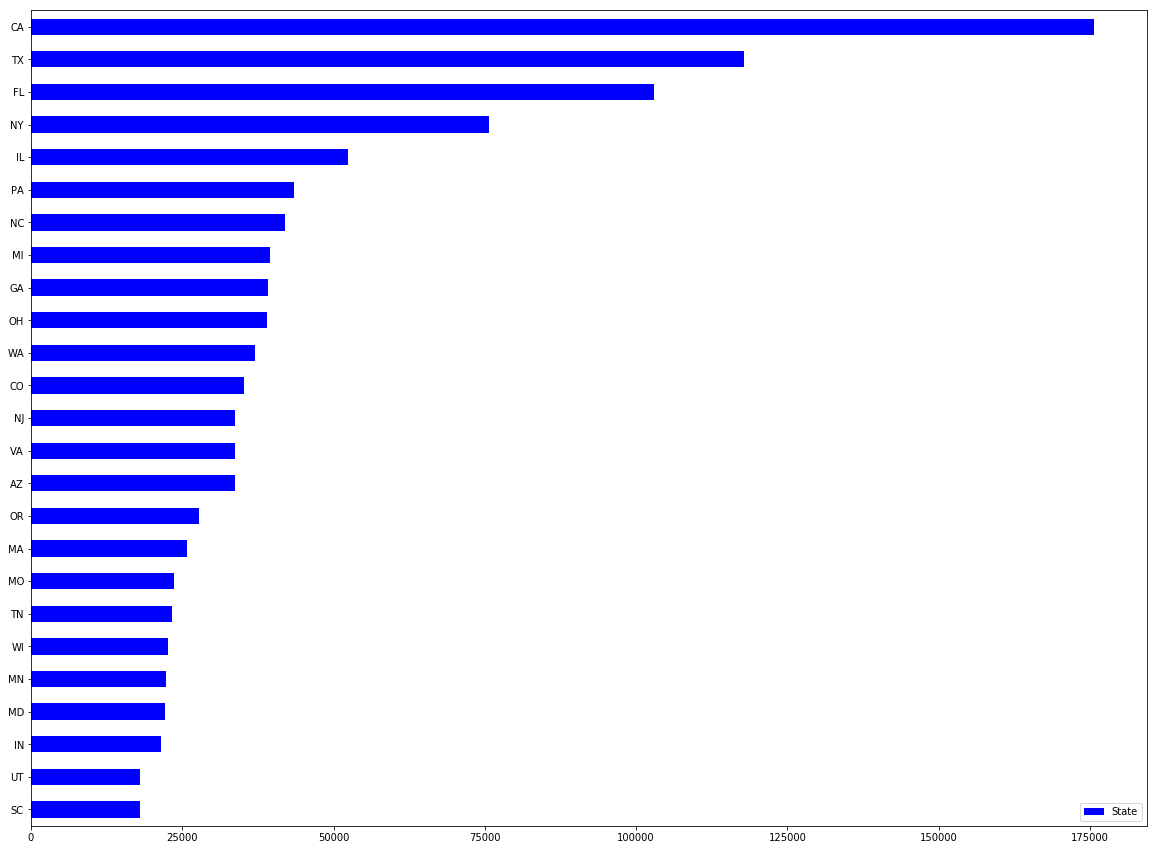

In [44]:
# show the number of places in each country
state_counts = defaultdict(int)
for s in df_places['state']:
    if s:
        state_counts[s] += 1

t = [(k, state_counts[k]) for k in list(state_counts.keys())]
s = sorted(t, key=lambda x:x[1])
types = [i[0] for i in s[-25:]]
data = [i[1] for i in s[-25:]]

df = pd.DataFrame(data, index=types, columns=['State'])
hbar = df.plot.barh(figsize=(20,15), colormap='bwr')
plt.show()

In [51]:
df_sj = df_places[(df_places['address'].str.contains('Campbell') \
                 | df_places['address'].str.contains('Cupertino') \
                 | df_places['address'].str.contains('Gilroy') \
                 | df_places['address'].str.contains('Los Altos') \
                 | df_places['address'].str.contains('Los Altos Hills') \
                 | df_places['address'].str.contains('Los Gatos') \
                 | df_places['address'].str.contains('Milpitas') \
                 | df_places['address'].str.contains('Monte Sereno') \
                 | df_places['address'].str.contains('Morgan Hill') \
                 | df_places['address'].str.contains('Mountain View') \
                 | df_places['address'].str.contains('Palo Alto') \
                 | df_places['address'].str.contains('San Jose') \
                 | df_places['address'].str.contains('Santa Clara') \
                 | df_places['address'].str.contains('Saratoga') \
                 | df_places['address'].str.contains('Sunnyvale')) \
                 & df_places['address'].str.contains('CA') & ~df_places['address'].str.contains('Philippines')]

#print(len(df_test))
#print(df_test['address'])

df_sj.to_csv('places_scc.csv', sep='\t', columns=['name','gPlusPlaceId','latitude','longitude'], index=False)

print('done')

10
done


In [34]:
print('done')

done
